In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Praca domowa nr 5
Piotr Fic

In [24]:
#Wczytanie danych
df = pd.read_csv("../../clustering.csv")

### Zbiór danych

In [25]:
df.head()

,4.178890744399839718e+01,5.222018158503714602e+01
0,-96.586516,90.957033
1,-54.143591,-99.153377
2,19.929231,-45.859779
3,-82.941076,84.099186
4,13.389996,-4.016202


Najpewniej obecne nazwy kolumn należy jednak wczytać jako pierwsze obserwacje.

In [26]:
df = pd.read_csv("../../clustering.csv", header=None, names=['x', 'y'])

In [27]:
df.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


In [28]:
df.describe()

,x,y
count,400.000000,400.000000
mean,-0.580656,-8.010264
std,48.821210,62.096845
min,-107.433649,-128.983720
25%,-34.551495,-70.730416
50%,5.691010,-3.447565
75%,31.456507,45.822610
max,109.733409,99.935839


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y       400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


Dla pewności sprawdziłem kompletność zbioru oraz podstawowe statystyki.

### Normalizacja zmiennych

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns]) #zachowa format dataframe i nazwy kolumn

In [32]:
df.describe()

,x,y
count,4.000000e+02,4.000000e+02
mean,-6.661338e-18,-1.887379e-17
std,1.001252e+00,1.001252e+00
min,-2.191400e+00,-1.950581e+00
25%,-6.966927e-01,-1.011303e+00
50%,1.286228e-01,7.356917e-02
75%,6.570358e-01,8.680037e-01
max,2.262382e+00,1.740528e+00


### Wizualizacja zbioru
Dzięki temu, że zbiór zawiera obserwacje z przestrzeni R<sup>2</sup> możemy go naturalnie zwizualizować oraz zobaczyć,  
że punkty ewidentnie grupują się w skupienia.

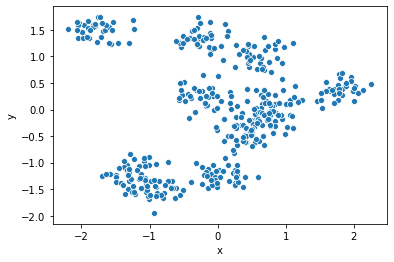

In [33]:
sns.scatterplot(df.x, df.y)

### Metoda klasteryzacji: k-średnich
### Wybór liczby klastrów: metoda łokcia

In [48]:
def score_kmeans(df, cluster_num_vector):
    """Funkcja zwraca miary wcss odpowiadające wartością k"""
    scores = []
    for k in cluster_num_vector:
        md = KMeans(n_clusters = k)
        md.fit(df)
        scr = md.score(df)
        scores.append(-scr)
    return(scores)

In [100]:
def plot_k_scores(k_vec, result, ylab, title):
    """Wizualizacja miary względem k"""
    plt.plot(k_vec, result, marker='h')
    plt.xticks(np.arange(min(k_vec), max(k_vec)+1, 2))
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel(ylab)
    plt.show()

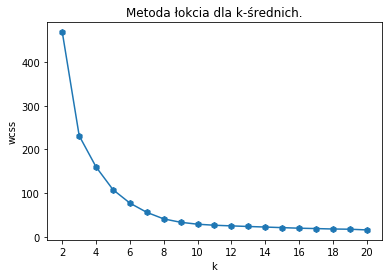

In [101]:
from sklearn.cluster import KMeans

#Kalkulacja wyników
k_vec = range(2, 21)
kmeans_result = score_kmeans(df, k_vec)
#Wykres
plot_k_scores(k_vec, kmeans_result, 'wcss', 'Metoda łokcia dla k-średnich.')

Metoda "łokcia" polega na dobraniu takiej liczby skupień, która jest ostatnią wnoszącą istotną zmianę w mierze wcss. Łatwo jest to dostrzec na wykresie, gdzie od optymalne 'k' jest argumentem, od którego wykres wcss się wypłaszcza. Metoda ta wymaga naszej subiektywnej oceny. Odpowiednie 'k', dla analizowanego przypadku, będzie miało według mnie wartość 8 lub 9.

In [88]:
def plot_clustering(df, model, k):
    """Tworzy scatterplot dla etykiet otrzymanych dla zbioru danych
    i modelu przekazanych do funkcji"""
    md = model(n_clusters=k)
    labels = md.fit_predict(df)
    
    data = df.copy()
    data['label'] = labels
    sns.lmplot(data = data, x='x', y='y', hue='label', fit_reg=False)
    plt.title("Wizualizacja skupień: " + str(k) + " klastrów.")

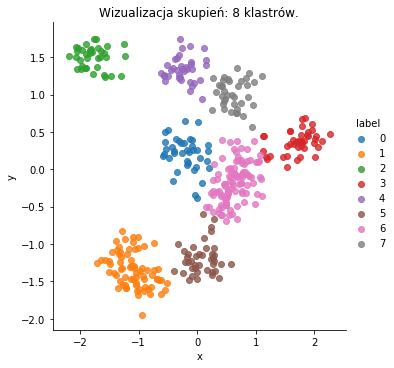

In [89]:
plot_clustering(df, KMeans, 8)

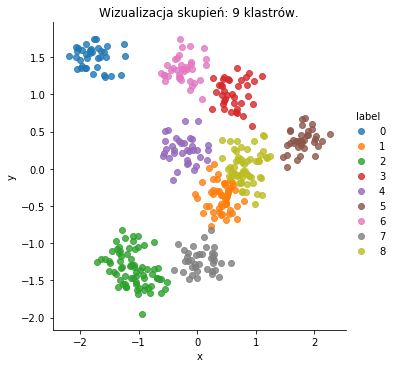

In [90]:
plot_clustering(df, KMeans, 9)

Powyżej przedstawiłem podziały na skupienia dla wytypowanych wartości 'k', pomoże to rozstrzygnąć wątpliwości z metody "łokcia". W mojej ocenie bardziej adekwatny podział otrzymaliśmy dla k=8, natomiast może to zależeć od subiektywnej oceny odbiorcy. Ogółem działanie modelu zakończyło się sukcesem.

### Metoda klasteryzacji: aglomeracyjna
### Wybór liczby klastrów: silhouette score

In [95]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

def score_clustering(df, model, k_vec, score_fun):
    """Oblicza miary, za pomocą przekazanej funkcji, względem k"""
    scores=[]
    for k in k_vec:
        md = model(n_clusters=k)
        labels = md.fit_predict(df)
        score = score_fun(df, labels)
        scores.append(score)
    return(scores)

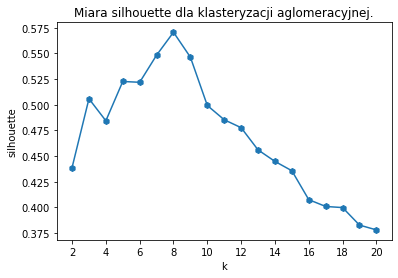

In [102]:
#Wyniki dla miary silhouette, wektor 'k' pozostaje taki sam jak dla k-średnich
agl_result = score_clustering(df, AgglomerativeClustering, k_vec, silhouette_score)
#Wykres
plot_k_scores(k_vec, agl_result, 'silhouette', 'Miara silhouette dla klasteryzacji aglomeracyjnej.')

W przypadku miary silhouette najwyższy wynik oznacza najlepiej dobrane 'k'. W naszym przypadku wynik jest jednoznaczny i optymalne 'k' jest równe 8. Powtarza się zatem z analizy metodą łokcia dla modelu k-średnich.

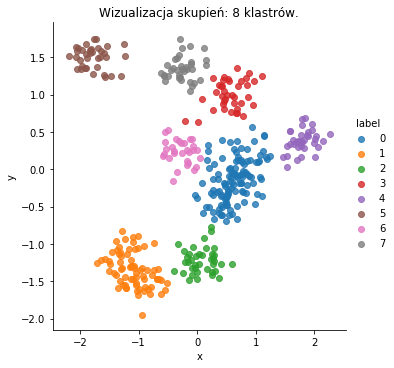

In [103]:
#Wizualizacja
plot_clustering(df, AgglomerativeClustering, 8)

Można zaobserwować, że podział na skupienia uzyskany metodą aglomeracyjną jest bardzo podobny do wcześniej otrzymanego metodą k-średnich.

### Porównanie za pomocą metryki interpretowalnej
Podziały na klastry uzyskane powyższymi modelami porównam za pomocą miary interpretowalnej. Wykorzystam średnią ze średnich odległości między punktami w klastrach.

In [106]:
from scipy.spatial import distance

def avg_dist_score(df, labels):
    """Oblicza miarę średniej odległości wewnątrz klastra"""
    distances = []
    for lab in labels:
        X = df.iloc[np.where(labels == lab)]
        dist_avg = np.mean(distance.pdist(X))
        distances.append(dist_avg)
    return np.mean(distances)

In [107]:
kmeans = KMeans(n_clusters=8)
aglomerative = AgglomerativeClustering(n_clusters=8)
km_lab = kmeans.fit_predict(df)
agg_lab = aglomerative.fit_predict(df)

kmeans_dist = avg_dist_score(df, km_lab)
agg_dist = avg_dist_score(df, agg_lab)

In [123]:
print("Średnia ze średnich odległości wenątrz skupień dla metody:")
print("K-średnich: {0:5.4f}".format(kmeans_dist))
print("Aglomeracyjej: {0:5.4f}".format(agg_dist))

Średnia ze średnich odległości wenątrz skupień dla metody:
K-średnich: 0.4025
Aglomeracyjej: 0.4093


Analizowany zbiór jest dość prosty, dlatego najpewniej różnica w metryce interpretowalnej jest niewielka.  
Korzystniej, pod względem tej miary, prezentuje się model k-średnich.  

Podsumowując, dwa modele analizy skupień bardzo dobrze poradziły sobie ze zbiorem danych. Otrzymany podział odpowiada intuicji bazującej na wizualizacji zbioru. Metoda silhouette pozwoliła łatwiej wytypować optymalną liczbę skupień, metoda "łokcia" wymagała subiektywnej interpretacji. Podobieństio rezultatu klastyryzacji dla obu modeli potwierdziła metryka interpretowalna.